Stroke prediction dataset (@Fedesoriano on Kaggle),
Here, we will try to implement a supervised learning algorithm to predict the probability of someone to have a stroke or not
We will use Logistic Regression for classification

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#Read the csv file
df = pd.read_csv('Stroke_Prediction_Dataset_from_Fedesoriano.csv')
df

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#Preparing the data

#Replacing categorical by binary value
df.smoking_status.replace(('never smoked', 'formerly smoked', 'smokes'), (0, 1, 2), inplace = True)
df.gender.replace(('Male', 'Female'), (1, 0), inplace = True)

#Deleting observations with unknown values
df.drop(df[df['smoking_status'] == 'Unknown'].index, inplace = True)
df = df.dropna()
df

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
2,2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
3,3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1
4,4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1
5,5,56669,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,5100,68398,1,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,0,0
5102,5102,45010,0,57.0,0,0,Yes,Private,Rural,77.93,21.7,0,0
5106,5106,44873,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,0
5107,5107,19723,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,0


In [4]:
#Gather information about dataset
df.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,2538.059253,37339.006130,48.645943,0.119089,0.060128,108.321891,30.290047,0.052539
std,1488.226479,21049.976345,18.851239,0.323941,0.237759,47.703541,7.295958,0.223145
min,0.000000,84.000000,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,1230.500000,18997.500000,34.000000,0.000000,0.000000,77.237500,25.300000,0.000000
50%,2538.500000,38068.500000,50.000000,0.000000,0.000000,92.360000,29.100000,0.000000
75%,3830.750000,55464.250000,63.000000,0.000000,0.000000,116.207500,34.100000,0.000000
max,5108.000000,72915.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


We will try to make a machine learning classification algorithm
0 = No stroke
1 = Stroke
Here, we only use one feature X (Average Glucose level) and one target Y (Stroke) because it is more simple

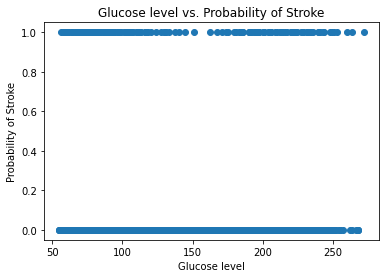

In [5]:
plt.scatter(df.avg_glucose_level, df.stroke)
plt.xlabel('Glucose level')
plt.ylabel('Probability of Stroke')
plt.title('Glucose level vs. Probability of Stroke')
plt.show()

In [6]:
#Splitting data into Train & Test set
x_train, x_test, y_train, y_test = train_test_split(df.avg_glucose_level, df.stroke, test_size=0.4, random_state=321)

In [7]:
#Training of the LR model
x_train_array = np.array(x_train).reshape(-1,1)
logistic = LogisticRegression()
model = logistic.fit(x_train_array, y_train)

In [8]:
print(model.coef_)

[[0.00743113]]


In [9]:
# Reshape data
x_test_array = np.array(x_test).reshape(-1,1)
# Model performance
print("Accuracy:", round(accuracy_score(y_test, model.predict(x_test_array)), 3))

Accuracy: 0.942


With Logistic Regression model, we can predict the probability that someone has a Stroke depending on his Glucose level with a precision of 94 %